## Image Processing in Python

**Course Structure:**
* Chapter 1. Introducing Image Processing and scikit-image
* Chapter 2. Filters, Contrast, Transformation and Morphology
* Chapter 3. Image restoration, Noise, Segmentation and Contours
* Chapter 4. Advanced Operations, Detecting Faces and Features

### CHAPTER 1. Introducing Image Processing and scikit-image

#### Part 1.1 Make images come alive with scikit-learn

**Image Processing:**
* It is an operation on images and videos to:
    * Enhance an image
    * Extract useful information
    * Analyze it and make decisions
* It is a subset of **Computer Vision**
* Its applications:
    * Medical image analysis
    * Artificial intelligence (AI)
    * Image restoration and enhancement
    * Geospatial computing  
    * Surveillance
    * Robotic vision
    * Automotive safety
    * And many more...
* Its purposes:
    1. Visualization -> observe objects that are not visible
    2. Image sharpening and restoration -> a better image
    3. Image retrieval -> seek for the image of interest
    4. Measurement of pattern -> measures various objects
    5. Image recognition -> distinguish objects in an image
       
**Scikit-image library:**
* Easy to use
* Makes use of Machine Learning built-in functions
* Out of the box complex algorithms
* Perform complex operations with just a few functions

**Images:**
* Digital image is a 2-dimensional matrix (columns and rows)
* Pixels contain information about color and intensity
* Color images are represented in RGB - 3 layers (Red, Green, Blue) of 2-dimensional arrays 
* Grayscale images only have intensity value (256 different possible values)    

In [10]:
# pre-defined function to show image
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [2]:
# Code for part 1.1 

# is it grayscale or full of color?
from skimage import data

# load two images
coffee_image = data.coffee()
coins_image = data.coins()

# get the image shape (height, width, number of channels)
print(coffee_image.shape)
print(coins_image.shape)
# print(coffee_image.shape[0], coffee_image.shape[1], coffee_image.shape[2])
# print(coins_image.shape[0], coins_image.shape[1])


(400, 600, 3)
(303, 384)


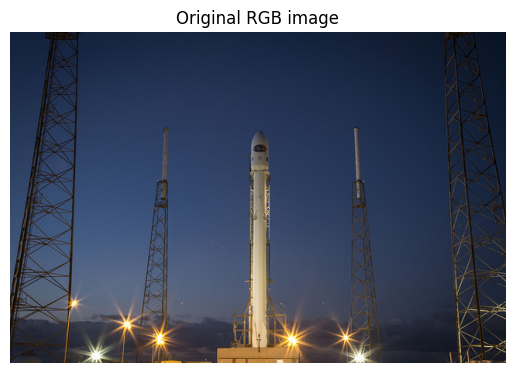

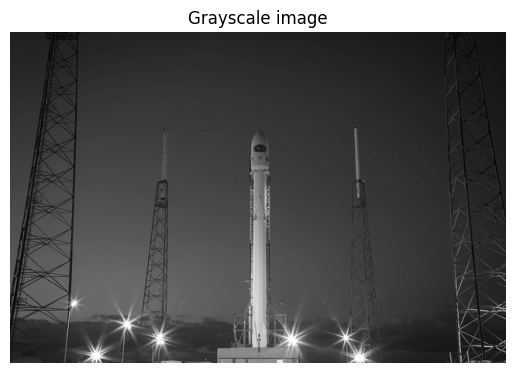

In [3]:
# Code for part 1.1 (continue)

# RGB to grayscale
from skimage import data, color

# load rocket image
rocket = data.rocket()

# convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# show the original image
show_image(rocket, 'Original RGB image')

# show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

#### Part 1.2 NumPy for images

* With NumPy, we can practice some image processing techniques:
    * Flipping
    * Extract and analyze features
* Image are in type of *'numpy.ndarray'*
* We can see individual color intensities along the image
* We can even display these colors using gray colormap
* We can see shapes of images by *'.shape'*

**Flipping images:**  
* Vertically: *'np.flipud()'* method
* Horizontally: *'np.fliplr()'* method

**Color histograms:**
* We can see the number of pixels of each intensity value (from 0 to 255)
* Applications of color histograms:
    * Analysis
    * Thresholding (an important topic in computer vision)
    * Alter brightness and contrast
    * Equalize an image

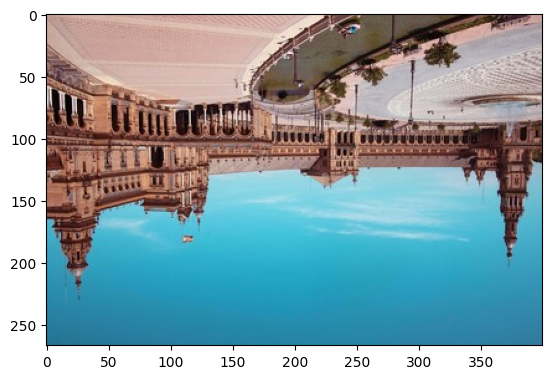

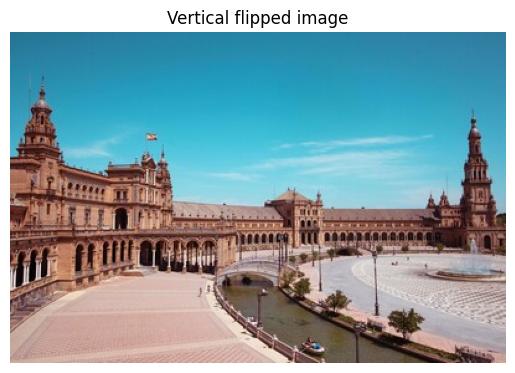

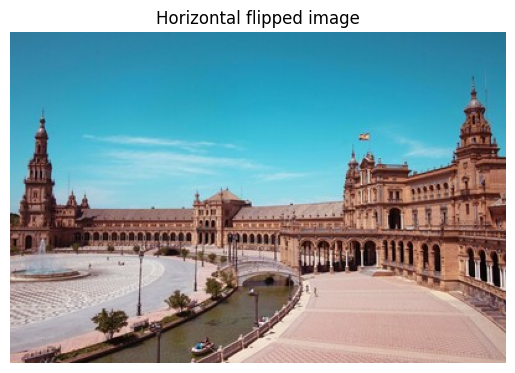

In [4]:
# Code for part 1.2 

# flipping out
import matplotlib.pyplot as plt
import numpy as np

# load image
flipped_seville = plt.imread('18_datasets/chapter 1/sevilleup(2).jpg')
plt.imshow(flipped_seville)
plt.show()

# flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)
show_image(seville_vertical_flip, 'Vertical flipped image')

# flip the image horizontally
seville_hozirontal_flip = np.fliplr(seville_vertical_flip)
show_image(seville_hozirontal_flip, 'Horizontal flipped image')

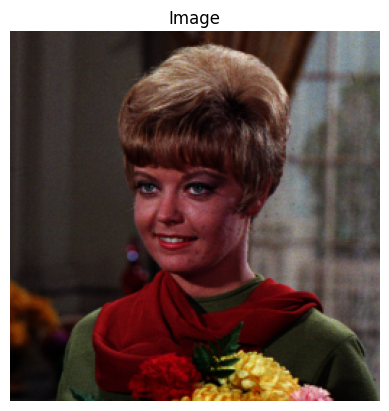

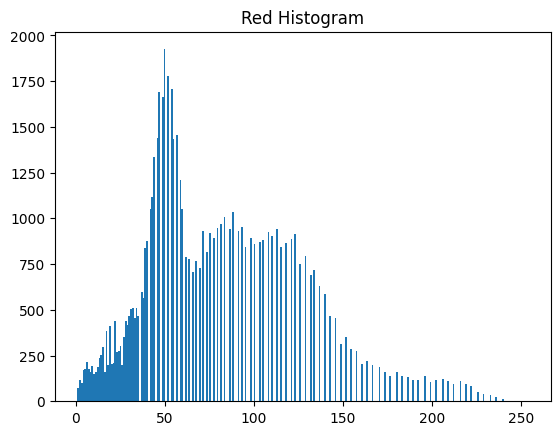

In [5]:
# Code for part 1.2 (continue)

# histograms
import matplotlib.pyplot as plt
import numpy as np

# load image
image = plt.imread('18_datasets/chapter 1/4.1.01.tiff')
show_image(image)

# obtain the red channel
red_channel = image[:, :, 0]

# plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)
plt.title('Red Histogram')
plt.show()

#### Part 1.3 Getting started with thresholding

**Thresholding:**
* It is used to partition the **background and foreground** of a grayscale image
* Achieved by making image black and white 
    * Compare each pixel to a given threshold value
    * Less than the value, turn white
    * Greater than the value, turn black
* It is the simplest method of image segmentation
* Can be used for:
    * Object detection
    * Face detection
    * And so on...
* Categories:
    1. global or histogram based: good for uniform backgrounds, use *'threshold_otsu()'* method to find optimal threshold value
    2. Local or adaptive: good for uneven background illumination, use *'threshold_local()'* method and set *'block_size'* to determine local neighborhoods

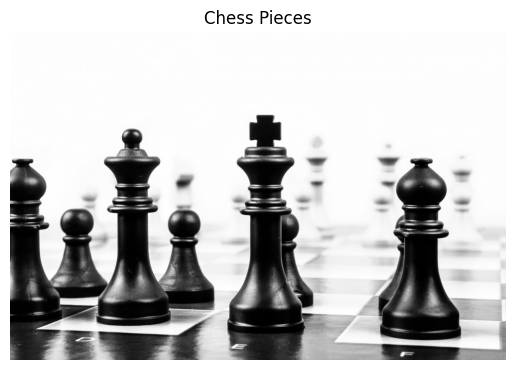

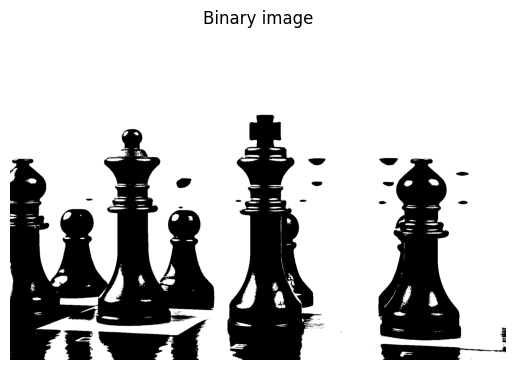

In [6]:
# Code for part 1.3 

# apply global thresholding
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage import color

# load the image
chess_pieces_image = plt.imread('18_datasets/chapter 1/bw.jpg')
show_image(chess_pieces_image, 'Chess Pieces')

# make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# obtain optimal threshold value
thresh = threshold_otsu(chess_pieces_image_gray)

# apply thresholding to image
binary = chess_pieces_image_gray > thresh
show_image(binary, 'Binary image')

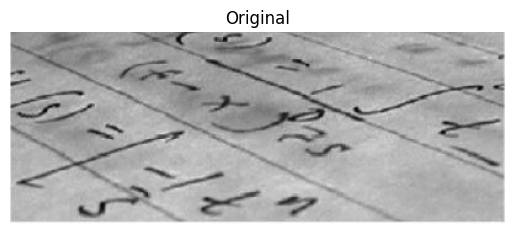

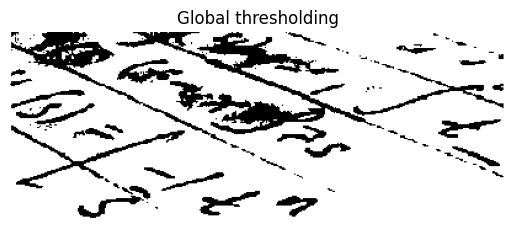

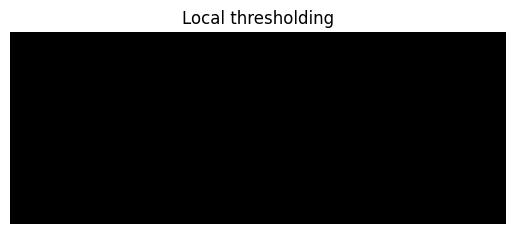

In [7]:
# Code for part 1.3 (continue)

# when the background isn't that obvious, 
# compare two approaches: global and local
from skimage.filters import threshold_otsu, threshold_local
import matplotlib.pyplot as plt
from skimage import color

# load the image
page_image = plt.imread('18_datasets/chapter 1/page.jpg')

# turn image into grayscale image
gray_page_image = color.rgb2gray(page_image)
show_image(gray_page_image, 'Original')

# obtain the global optimal thresh value
global_thresh = threshold_otsu(gray_page_image)

# obtain binary_global image
binary_global = gray_page_image > global_thresh
show_image(binary_global, 'Global thresholding')

# set block size
block_size = 35

# obtain the local optimal threshold value
local_thresh = threshold_local(gray_page_image, block_size, offset=10)

# obtain the binary_local image
binary_local = gray_page_image > local_thresh
show_image(binary_local, 'Local thresholding')

# local thresholding seems didn't work here!

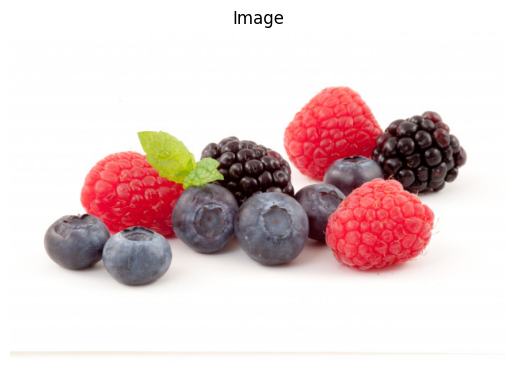

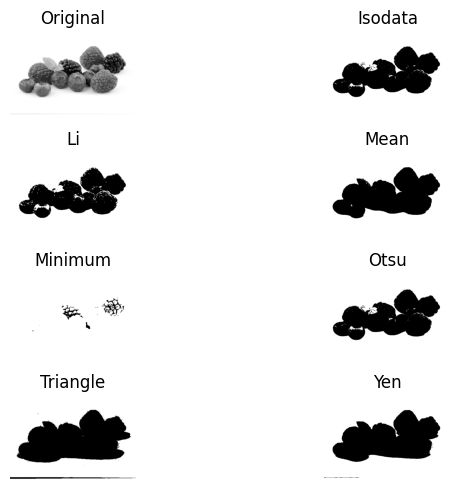

In [8]:
# Code for part 1.3 (continue)

# trying other methods
import matplotlib.pyplot as plt
from skimage.filters import try_all_threshold
from skimage.color import rgb2gray

# load the image
fruits_image = plt.imread('18_datasets/chapter 1/fruits-2.jpg')
show_image(fruits_image)

# turn image to grayscale
grayscale = rgb2gray(fruits_image)

# try all methods
fig, ax = try_all_threshold(grayscale, verbose=False)
plt.show()



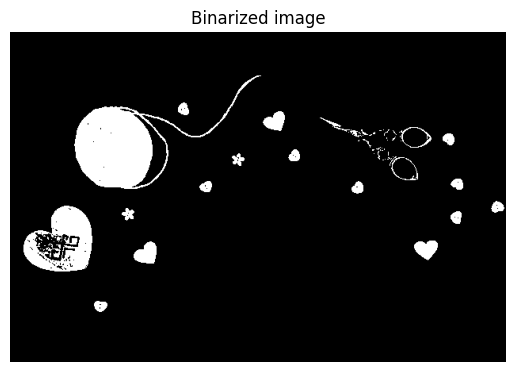

In [9]:
# Code for part 1.3 (continue)

# apply thresholding
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# load the image
tools_image = plt.imread('18_datasets/chapter 1/shapes52.jpg')

# turn image into grayscale
gray_tools_image = rgb2gray(tools_image)

# obtain optimal thresh
thresh = threshold_otsu(gray_tools_image)

# obtain binary image
binary_image = gray_tools_image > thresh
show_image(binary_image, 'Binarized image')


### CHAPTER 2. Filters, Contrast, Transformation and Morphology

#### Part 2.1 Jump into filtering

**Filters:**
* It is a mathematical operation applied to images
* It is used for:
    * Emphasize or remove features
    * Smoothing
    * Sharpening
    * Edge detection

**Edge detection:**
* It is used to find boundaries of objects in image
* It works by detecting *discontinuities* in brightness
* Common edge detection algorithm -> **Sobel**
* It worked on grayscale images only

**Smoothing:**
* It is achieved by a **Gaussian filter**
* It is used to blur an image or to reduce noise

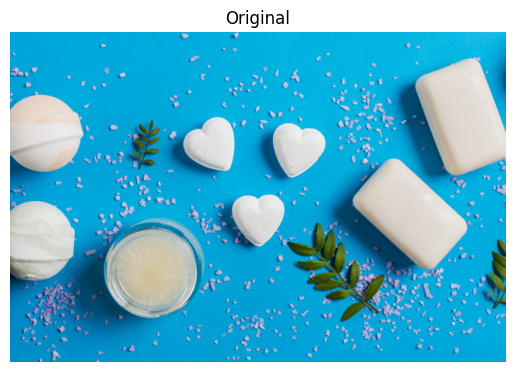

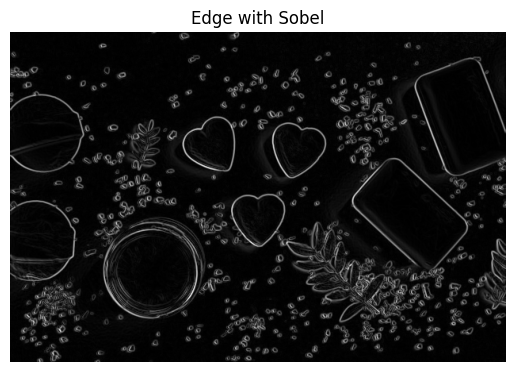

In [11]:
# Code for part 2.1

# edge detection
import matplotlib.pyplot as plt
from skimage import color
from skimage.filters import sobel

# load the image
soap_image = plt.imread('18_datasets/chapter 2/soap_image.jpg')

# turn image into grayscale
soap_image_gray = color.rgb2gray(soap_image)

# apply edge detection filter
edge_sobel = sobel(soap_image_gray)
show_image(soap_image, 'Original')
show_image(edge_sobel, 'Edge with Sobel')

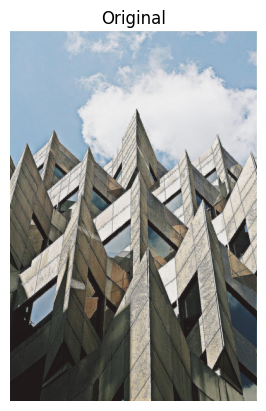

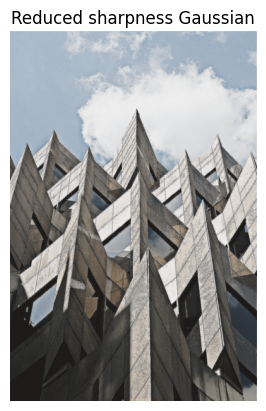

In [12]:
# Code for part 2.1 (continue)

# blurring to reduce noise
import matplotlib.pyplot as plt
from skimage.filters import gaussian

# load the image
building_image = plt.imread('18_datasets/chapter 2/building_image.jpg')

# apply gaussian filter
gaussian_image = gaussian(building_image)
show_image(building_image, 'Original')
show_image(gaussian_image, 'Reduced sharpness Gaussian')

#### Part 2.2 Contrast enhancement

*